# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [30]:
data = pd.read_csv("hasil_clustering.csv")

print(data)

      id_transaksi       jenis_item  jumlah tanggal pembelian  nama_customer  \
0         133889.0       Alat Tulis     1.0          1/1/2010   Stacy Campos   
1         133889.0     Buku Sejarah     1.0          1/1/2010   Stacy Campos   
2         133889.0   Buku Anak-Anak     2.0          1/1/2010   Stacy Campos   
3         133889.0  Majalah Fashion     1.0          1/1/2010   Stacy Campos   
4         133889.0   Majalah Berita     2.0          1/1/2010   Stacy Campos   
...            ...              ...     ...               ...            ...   
2459      134294.0       Alat Tulis     3.0         4/30/2024  Richard Jones   
2460      134294.0     Buku Sejarah     4.0         4/30/2024  Richard Jones   
2461      134294.0   Buku Anak-Anak     2.0         4/30/2024  Richard Jones   
2462      134294.0  Majalah Fashion     9.0         4/30/2024  Richard Jones   
2463      134294.0   Majalah Berita     4.0         4/30/2024  Richard Jones   

         total  jenis_item_encoded  clu

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [31]:
df = data.copy()
X = df[['total', 'jumlah', 'jenis_item_encoded']]
y = df['cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [32]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       231
           1       1.00      1.00      1.00        66
           2       1.00      1.00      1.00        64
           3       1.00      1.00      1.00       132

    accuracy                           1.00       493
   macro avg       1.00      1.00      1.00       493
weighted avg       1.00      1.00      1.00       493

Accuracy: 1.0


# Pembagian Data
Langkah pertama yang dilakukan adalah pembagian data menjadi dua bagian, yaitu data latih (training set) dan data uji (test set).
# Membangun Model Klasifikasi dengan Random Forest
Menggabungkan banyak pohon keputusan untuk meningkatkan akurasi dan mengurangi risiko overfitting. Model dilatih menggunakan data latih (X_train dan y_train) untuk mengenali pola dalam data, kemudian diuji dengan data uji (X_test). Hasil prediksi model dibandingkan dengan label sebenarnya untuk mengevaluasi kinerjanya. Metode classification_report memberikan metrik seperti precision, recall, dan F1-score, sementara accuracy_score mengukur akurasi model, yang dalam contoh ini mencapai 1.00, menunjukkan bahwa model mampu memprediksi dengan benar untuk semua data uji.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

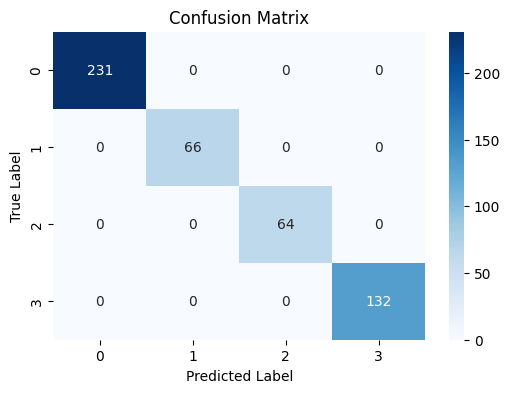

In [33]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [34]:
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))

Precision: 1.0
Recall: 1.0
F1-Score: 1.0


# Hasil Analisis:
Hasil evaluasi menunjukkan bahwa model mencapai performa sempurna (100%) pada precision, recall, dan F1-score. Ini berarti model mampu mengklasifikasikan semua data dengan benar tanpa kesalahan.
Namun, perlu diperhatikan beberapa kemungkinan penyebab hasil yang terlalu sempurna:
1. Overfitting: Model terlalu menyesuaikan diri dengan data latih sehingga tidak generalisasi dengan baik terhadap data baru.
2. Distribusi Data yang Terlalu Mudah: Jika dataset memiliki pola yang sangat jelas, model bisa mendapatkan akurasi tinggi tanpa tantangan berarti.
3. Data Uji yang Sama dengan Data Latih: Jika data uji tidak benar-benar terpisah dari data latih, hasil evaluasi bisa tidak mencerminkan performa sesungguhnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [35]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, 
                           cv=5, verbose=2, n_jobs=-1, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_grid = grid_search.best_estimator_
y_pred = best_grid.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total ti

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.

In [36]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       231
           1       1.00      1.00      1.00        66
           2       1.00      1.00      1.00        64
           3       1.00      1.00      1.00       132

    accuracy                           1.00       493
   macro avg       1.00      1.00      1.00       493
weighted avg       1.00      1.00      1.00       493

Accuracy: 1.0
Confusion Matrix:
[[231   0   0   0]
 [  0  66   0   0]
 [  0   0  64   0]
 [  0   0   0 132]]


2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [37]:
y_pred_before_tuning = clf.predict(X_test)

print("Before Tuning:")
print(classification_report(y_test, y_pred_before_tuning))
print("Accuracy Before Tuning:", accuracy_score(y_test, y_pred_before_tuning))

print("After Tuning:")
print(classification_report(y_test, y_pred))
print("Accuracy After Tuning:", accuracy_score(y_test, y_pred))

Before Tuning:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       231
           1       1.00      1.00      1.00        66
           2       1.00      1.00      1.00        64
           3       1.00      1.00      1.00       132

    accuracy                           1.00       493
   macro avg       1.00      1.00      1.00       493
weighted avg       1.00      1.00      1.00       493

Accuracy Before Tuning: 1.0
After Tuning:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       231
           1       1.00      1.00      1.00        66
           2       1.00      1.00      1.00        64
           3       1.00      1.00      1.00       132

    accuracy                           1.00       493
   macro avg       1.00      1.00      1.00       493
weighted avg       1.00      1.00      1.00       493

Accuracy After Tuning: 1.0


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
    - Sebelum Tuning:
      - Accuracy: 1.0
      - Precision, Recall, F1-Score: Semua bernilai 1.0 untuk setiap kelas.
      - Confusion Matrix: Semua prediksi benar, tidak ada kesalahan klasifikasi.
    - Setelah Tuning:
      - Accuracy: 1.0
      - Precision, Recall, F1-Score: Semua bernilai 1.0 untuk setiap kelas.
      Confusion Matrix: Semua prediksi benar, tidak ada kesalahan klasifikasi.
    - Tidak ada perbedaan signifikan antara model sebelum dan sesudah tuning. Keduanya mencapai akurasi sempurna (100%) pada data testing.
    - Hal ini menunjukkan bahwa model Random Forest yang digunakan sudah sangat baik dalam mengklasifikasikan data tanpa perlu tuning lebih lanjut.
2. Identifikasi kelemahan model, seperti:
  - Precision dan Recall:
    - Precision dan Recall untuk semua kelas bernilai 1.0, yang berarti model tidak memiliki kesalahan dalam mengklasifikasikan data.
    - Tidak ada kelas yang memiliki Precision atau Recall rendah.
  - Overfitting atau Underfitting:
    - Overfitting: Model yang terlalu kompleks dapat overfit pada data training, tetapi dalam kasus ini, model juga mencapai akurasi sempurna pada data testing. Ini menunjukkan bahwa model tidak overfit.
    - Underfitting: Model tidak underfit karena performanya sangat baik pada data testing.
  - Model tidak memiliki kelemahan yang signifikan dalam hal Precision, Recall, atau kecenderungan overfitting/underfitting.
  - Namun, akurasi sempurna (100%) bisa menjadi indikasi bahwa dataset mungkin terlalu sederhana atau memiliki pola yang sangat jelas, sehingga model mudah mempelajarinya.
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.
  - Evaluasi Dataset:
    - Periksa apakah dataset memiliki variasi yang cukup atau apakah ada kemungkinan data terlalu mudah diprediksi.
    - Jika dataset terlalu kecil atau tidak representatif, pertimbangkan untuk mengumpulkan lebih banyak data dengan variasi yang lebih besar.
  - Uji pada Data Baru:
    - Uji model pada data baru yang benar-benar belum pernah dilihat sebelumnya untuk memastikan generalisasi model.